In [36]:
# imports
import pandas as pd
import numpy as np
import yfinance as yf
import tsfel
import logging
from sklearn.manifold import TSNE
import seaborn as sns

In [37]:
# Technology Stocks
technology_stocks = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "META",
    "NVDA", "TSLA", "CRM", "ADBE", "IBM",
    "INTC", "CSCO", "ORCL", "QCOM", "PYPL",
    "NFLX", "AVGO", "AMD", "ZM", "SHOP"
]

# Energy Stocks
energy_stocks = [
    "XOM", "CVX", "BP", "TTE", "TOT",
    "COP", "OXY", "SLB", "EOG", "KMI",
    "PSX", "VLO", "EPD", "HAL", "E",
    "CNQ", "DVN", "APA", "BKR", "WMB"
]

# Healthcare Stocks
healthcare_stocks = [
    "JNJ", "PFE", "MRK", "ABBV", "UNH",
    "TMO", "MDT", "ABT", "BMY", "LLY",
    "AMGN", "GILD", "REGN", "VRTX", "ZTS",
    "BIIB", "ISRG", "SYK", "DHR", "CVS"
]

# Financial Stocks
financial_stocks = [
    "JPM", "BAC", "C", "WFC", "GS",
    "MS", "AXP", "COF", "USB", "PNC",
    "SCHW", "BK", "BLK", "TROW", "STT",
    "AMTD", "ICE", "NDAQ", "MMC", "CB"
]

# Industrial Stocks
industrial_stocks = [
    "HON", "GE", "MMM", "CAT", "DE",
    "UPS", "LMT", "BA", "NOC", "RTX",
    "GD", "EMR", "ETN", "ITW", "ROP",
    "PH", "DOV", "FTV", "IR", "TXT"
]

# Consumer Discretionary Stocks
consumer_discretionary_stocks = [
    "NKE", "MCD", "SBUX", "TJX", "LOW",
    "TGT", "DLTR", "DG", "ROST", "YUM",
    "BBY", "GPS", "KMX", "LVS", "MAR",
    "HLT", "WYNN", "MGM", "CMG", "RCL"
]

In [38]:
# # Check if lists have same elements
# for i in range(1, len(technology_stocks)):
#     if technology_stocks[i] != energy_stocks[i] or technology_stocks[i] != retail_stocks[i] or technology_stocks[i] != healthcare_stocks[i] or technology_stocks[i] != financial_stocks[i] or technology_stocks[i] != industrial_stocks[i] or technology_stocks[i] != consumer_discretionary_stocks[i]:
#         logging.error("Stock lists are not the same")
#     else:
#         logging.info("Stock lists are the same")

Stock Prices

In [39]:
# retail_prices = pd.read_csv("./Data/retail_prices.csv")
technology_prices = pd.read_csv("./Data/technology_prices.csv")
energy_prices = pd.read_csv("./Data/energy_prices.csv")
healthcare_prices = pd.read_csv("./Data/healthcare_prices.csv")
financial_prices = pd.read_csv("./Data/financial_prices.csv")
industrial_prices = pd.read_csv("./Data/industrial_prices.csv")
consumer_discretionary_prices = pd.read_csv("./Data/consumer_discretionary_prices.csv")

In [40]:
# Price shapes
# print("Retail Prices Shape: ", retail_prices.shape)
print("Technology Prices Shape: ", technology_prices.shape)
print("Energy Prices Shape: ", energy_prices.shape)
print("Healthcare Prices Shape: ", healthcare_prices.shape)
print("Financial Prices Shape: ", financial_prices.shape)
print("Industrial Prices Shape: ", industrial_prices.shape)
print("Consumer Discretionary Prices Shape: ", consumer_discretionary_prices.shape)

Technology Prices Shape:  (3502, 21)
Energy Prices Shape:  (3376, 21)
Healthcare Prices Shape:  (3459, 21)
Financial Prices Shape:  (3412, 21)
Industrial Prices Shape:  (3509, 21)
Consumer Discretionary Prices Shape:  (3508, 21)


In [41]:
# Join all sotck prices on Datetime
# stocks_prices = pd.merge(retail_prices, technology_prices, on="Datetime")
stocks_prices = pd.merge(technology_prices, energy_prices, on="Datetime")
stocks_prices = pd.merge(stocks_prices, healthcare_prices, on="Datetime")
stocks_prices = pd.merge(stocks_prices, financial_prices, on="Datetime")
stocks_prices = pd.merge(stocks_prices, industrial_prices, on="Datetime")
stocks_prices = pd.merge(stocks_prices, consumer_discretionary_prices, on="Datetime")

In [42]:
stocks_prices.shape

(3278, 121)

In [43]:
stocks_prices.head()

,Datetime,AAPL,ADBE,AMD,AMZN,AVGO,CRM,CSCO,GOOGL,IBM,...,MCD,MGM,NKE,RCL,ROST,SBUX,TGT,TJX,WYNN,YUM
0,2022-05-16 09:30:00-04:00,146.500000,402.989990,98.009003,112.888504,585.489990,165.770004,49.580002,115.267006,134.220001,...,243.199997,36.639999,113.169998,62.820000,91.669998,74.190002,218.619995,56.540001,66.540001,112.190002
1,2022-05-16 10:30:00-04:00,145.020004,402.519989,94.938904,110.928001,578.840027,163.184998,49.400002,114.289001,134.244995,...,243.220001,36.180000,112.300003,61.595001,90.654999,73.260002,217.050003,55.794998,65.010002,111.805000
2,2022-05-16 11:30:00-04:00,145.730103,403.579987,95.503403,111.143005,582.669922,164.169998,49.375000,114.790001,134.679993,...,243.759995,36.060001,112.070000,61.580002,90.879997,73.385002,217.979996,55.790001,65.046501,112.110001
3,2022-05-16 12:30:00-04:00,146.589996,404.304993,96.000000,111.200241,586.219971,165.199997,49.404999,114.703506,135.220001,...,243.889999,35.990002,112.756699,62.180000,91.709999,73.113403,220.529999,56.509998,65.239998,112.330002
4,2022-05-16 13:30:00-04:00,147.238693,406.100006,96.368896,112.126999,588.260010,165.710007,49.535000,115.300003,136.240005,...,244.970001,35.764999,113.199997,62.200001,92.040001,73.349998,221.289993,56.580002,65.169998,112.894997


### Stock features

Technical features

In [44]:
# retail_tech_features = pd.read_csv("./Data/retail_TSFEL_features.csv")
technology_tech_features = pd.read_csv("./Data/technology_TSFEL_features.csv")
energy_tech_features = pd.read_csv("./Data/energy_TSFEL_features.csv")
healthcare_tech_features = pd.read_csv("./Data/healthcare_TSFEL_features.csv")
financial_tech_features = pd.read_csv("./Data/financial_TSFEL_features.csv")
industrial_tech_features = pd.read_csv("./Data/industrial_TSFEL_features.csv")
consumer_discretionary_tech_features = pd.read_csv("./Data/consumer_discretionary_TSFEL_features.csv")

Fundamental features

In [45]:
# retail_fund_features = pd.read_csv("./Data/retail_data.csv")
technology_fund_features = pd.read_csv("./Data/tech_data.csv")
energy_fund_features = pd.read_csv("./Data/energy_data.csv")
healthcare_fund_features = pd.read_csv("./Data/healthcare_data.csv")
financial_fund_features = pd.read_csv("./Data/financial_data.csv")
industrial_fund_features = pd.read_csv("./Data/industrial_data.csv")
consumer_discretionary_fund_features = pd.read_csv("./Data/consumer_discretionary_data.csv")

#### Final Data

In [46]:
# Joining features
# retail_data = retail_tech_features.merge(retail_fund_features, left_on="stock", right_on="symbol", how="left")
technology_data = technology_tech_features.merge(technology_fund_features, left_on="stock", right_on="symbol", how="left")
energy_data = energy_tech_features.merge(energy_fund_features, left_on="stock", right_on="symbol", how="left")
healthcare_data = healthcare_tech_features.merge(healthcare_fund_features, left_on="stock", right_on="symbol", how="left")
financial_data = financial_tech_features.merge(financial_fund_features, left_on="stock", right_on="symbol", how="left")
industrial_data = industrial_tech_features.merge(industrial_fund_features, left_on="stock", right_on="symbol", how="left")
consumer_discretionary_data = consumer_discretionary_tech_features.merge(consumer_discretionary_fund_features, left_on="stock", right_on="symbol", how="left")

In [47]:
# Join all data
all_data = pd.concat([technology_data, energy_data, healthcare_data, financial_data, industrial_data, consumer_discretionary_data], axis=0)

In [48]:
all_data.head(3)

,stock,0_Absolute energy,0_Average power,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,0_ECDF_2,...,returnOnEquity,freeCashflow,operatingCashflow,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio
0,AAPL,9.772775e+07,2.791424e+06,700.0,2801.0,146.699997,184.225006,0.000286,0.000571,0.000857,...,1.47250,8.472687e+10,1.105630e+11,0.007,-0.043,0.45586,0.33968,0.30743,USD,2.2226
1,ADBE,7.313290e+08,2.088915e+07,700.0,2801.0,344.859985,549.840027,0.000286,0.000571,0.000857,...,0.32367,6.730375e+09,6.783000e+09,-0.498,0.113,0.88082,0.38067,0.36800,USD,1.7657
2,AMD,4.519529e+07,1.290925e+06,700.0,2801.0,77.169998,138.770004,0.000286,0.000571,0.000857,...,0.02013,2.385500e+09,1.702000e+09,NaN,0.022,0.50561,0.16829,0.00658,USD,0.6002


In [49]:
columns_t_drop = ["symbol", '0_ECDF Percentile Count_0', '0_ECDF Percentile Count_1',
                  '0_ECDF Percentile_0', '0_ECDF Percentile_1', '0_ECDF_0', '0_ECDF_1',
                  '0_ECDF_2', '0_ECDF_3', '0_ECDF_4', '0_ECDF_5', '0_ECDF_6', '0_ECDF_7',
                  '0_ECDF_8', '0_ECDF_9', '0_Histogram_0', '0_Histogram_1', '0_Histogram_2',
                  '0_Histogram_3', '0_Histogram_4', '0_Histogram_5', '0_Histogram_6', '0_Histogram_7',
                  '0_Histogram_8', '0_Histogram_9', 'currency']
all_data.drop(columns=columns_t_drop, inplace=True)

In [50]:
# Put stock column as index
all_data.set_index("stock", inplace=True)

In [51]:
all_data.to_csv("./Data/all_data.csv")

In [52]:
# # Calculate Resturns and Volatility
# # Calculate average annual percentage return and volatilities over a theoretical one year period
# returns_retail = retail_prices.pct_change().mean() * 252
# returns_retail = pd.DataFrame(returns_retail)
# returns_retail.columns = ['Returns']
# returns_retail['Volatility'] = retail_prices.pct_change().std() * np.sqrt(252)
# returns_retail.head(5)
# # data=returns_retail
# #format the data as a numpy array to feed into the K-Means algorithm
# #data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

In [53]:
# # Calculate average annual percentage return and volatilities over a theoretical one year period
# returns_technology = technology_prices.pct_change().mean() * 252
# returns_technology = pd.DataFrame(returns_technology)
# returns_technology.columns = ['Returns']
# returns_technology['Volatility'] = technology_prices.pct_change().std() * np.sqrt(252)
# returns_technology.head(5)
# # data=returns_retail
# #format the data as a numpy array to feed into the K-Means algorithm
# #data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

In [54]:
# # Calculate average annual percentage return and volatilities over a theoretical one year period
# returns_energy = energy_prices.pct_change().mean() * 252
# returns_energy = pd.DataFrame(returns_energy)
# returns_energy.columns = ['Returns']
# returns_energy['Volatility'] = energy_prices.pct_change().std() * np.sqrt(252)
# returns_energy.head(5)
# # data=returns_retail
# #format the data as a numpy array to feed into the K-Means algorithm
# #data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

In [55]:
all_data = pd.read_csv("./Data/all_data.csv")

In [56]:
# Put stock column as index
all_data.set_index("stock", inplace=True)

In [57]:
all_data.head(5)

,0_Absolute energy,0_Average power,0_Entropy,0_Interquartile range,0_Kurtosis,0_Max,0_Mean,0_Mean absolute deviation,0_Median,0_Median absolute deviation,...,returnOnEquity,freeCashflow,operatingCashflow,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio
stock,,,,,,,,,,,,,,,,,,,,,
AAPL,9.772775e+07,2.791424e+06,0.981388,32.097507,-1.092021,198.789993,166.002722,16.193351,169.465546,16.051956,...,1.47250,8.472687e+10,1.105630e+11,0.007,-0.043,0.45586,0.33968,0.30743,USD,2.2226
ADBE,7.313290e+08,2.088915e+07,0.992566,164.935005,-1.266632,637.229980,445.823535,90.095438,429.770004,85.930008,...,0.32367,6.730375e+09,6.783000e+09,-0.498,0.113,0.88082,0.38067,0.36800,USD,1.7657
AMD,4.519529e+07,1.290925e+06,0.989915,39.555553,0.029304,226.450104,107.917918,27.790657,101.109997,19.750000,...,0.02013,2.385500e+09,1.702000e+09,NaN,0.022,0.50561,0.16829,0.00658,USD,0.6002
AMZN,6.019577e+07,1.719388e+06,0.986816,38.781298,-0.596529,190.907394,128.193063,22.222980,126.564999,19.599998,...,0.20305,5.726975e+10,9.914700e+10,2.167,0.125,0.47594,0.16354,0.10681,USD,2.0562
AVGO,2.455118e+09,7.012619e+07,0.996113,372.112534,-0.798959,1434.760010,787.907258,242.889210,646.410004,178.013245,...,0.24749,1.883950e+10,1.886400e+10,1.881,0.164,0.74239,0.52500,0.31765,USD,1.5994


### PCA

Pre-processing

In [58]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Separate numerical and categorical columns
numerical_features = all_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = all_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Fit and transform the data
X_preprocessed = preprocessor.fit_transform(all_data)

In [59]:
X_preprocessed = pd.DataFrame(X_preprocessed, columns=numerical_features + preprocessor.named_transformers_['cat'].get_feature_names_out().tolist())
X_preprocessed.head(5)

,0_Absolute energy,0_Average power,0_Entropy,0_Interquartile range,0_Kurtosis,0_Max,0_Mean,0_Mean absolute deviation,0_Median,0_Median absolute deviation,...,lastSplitFactor_9434:10000,lastSplitFactor_nan,exchange_NMS,exchange_NYQ,quoteType_EQUITY,recommendationKey_buy,recommendationKey_hold,financialCurrency_CAD,financialCurrency_EUR,financialCurrency_USD
0,-0.156201,-0.157311,0.765298,-0.136568,-0.271150,-0.157822,-0.073019,-0.193325,-0.038894,-0.120092,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.335958,0.335325,1.100704,1.610774,-0.315717,1.080871,1.200579,1.361153,1.201807,1.776255,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,-0.197006,-0.198156,1.021171,-0.038465,0.015051,-0.079676,-0.337391,0.050616,-0.364701,-0.019734,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-0.185354,-0.186493,0.928153,-0.048650,-0.144683,-0.180092,-0.245109,-0.066496,-0.243373,-0.023805,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,1.674934,1.675602,1.207150,4.335984,-0.196351,3.334076,2.757566,4.575062,2.234389,4.275206,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [60]:
# Check for missing values
missing_values = X_preprocessed.isnull().sum()
missing_values[missing_values > 0]

fullTimeEmployees               2
auditRisk                       2
boardRisk                       2
compensationRisk                2
shareHolderRightsRisk           2
overallRisk                     2
governanceEpochDate             2
compensationAsOfEpochDate       1
dividendRate                   18
dividendYield                  18
exDividendDate                 14
payoutRatio                    21
fiveYearAvgDividendYield       19
beta                            1
trailingPE                      6
forwardPE                       1
bid                             1
ask                             1
trailingAnnualDividendRate     21
trailingAnnualDividendYield    21
heldPercentInsiders             2
shortPercentOfFloat             5
priceToBook                     8
earningsQuarterlyGrowth        14
forwardEps                      1
pegRatio                        1
lastSplitDate                  19
enterpriseToEbitda             14
lastDividendValue              16
lastDividendDa

In [61]:
# Drop columns with missing values
X_preprocessed.dropna(axis=1, inplace=True)

In [62]:
X_preprocessed.head(5)

,0_Absolute energy,0_Average power,0_Entropy,0_Interquartile range,0_Kurtosis,0_Max,0_Mean,0_Mean absolute deviation,0_Median,0_Median absolute deviation,...,lastSplitFactor_9434:10000,lastSplitFactor_nan,exchange_NMS,exchange_NYQ,quoteType_EQUITY,recommendationKey_buy,recommendationKey_hold,financialCurrency_CAD,financialCurrency_EUR,financialCurrency_USD
0,-0.156201,-0.157311,0.765298,-0.136568,-0.271150,-0.157822,-0.073019,-0.193325,-0.038894,-0.120092,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.335958,0.335325,1.100704,1.610774,-0.315717,1.080871,1.200579,1.361153,1.201807,1.776255,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,-0.197006,-0.198156,1.021171,-0.038465,0.015051,-0.079676,-0.337391,0.050616,-0.364701,-0.019734,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-0.185354,-0.186493,0.928153,-0.048650,-0.144683,-0.180092,-0.245109,-0.066496,-0.243373,-0.023805,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,1.674934,1.675602,1.207150,4.335984,-0.196351,3.334076,2.757566,4.575062,2.234389,4.275206,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [63]:
from sklearn.decomposition import PCA

# Fit the PCA model
pca = PCA()
pca_data = pca.fit(X_preprocessed)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 90% of the variance
num_components = np.argmax(cumulative_explained_variance >= 0.90) + 1

print(f"Number of components that explain at least 90% of the variance: {num_components}")

Number of components that explain at least 90% of the variance: 17


In [64]:
# Fit the PCA model with the selected number of components
pca = PCA(n_components=num_components)
pca_data = pca.fit_transform(X_preprocessed)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(pca_data, columns=[f"PC{i+1}" for i in range(num_components)])
pca_df.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-1.519125,18.291418,-1.110815,-1.679384,2.716959,-0.987255,2.188325,0.643086,0.407921,-1.451995,0.646009,-0.439141,0.093019,0.233622,-1.101991,0.526600,0.251227
1,5.198793,-0.376011,0.883560,1.993133,0.069098,-0.487068,-0.036920,-0.546433,0.476628,-0.839515,-0.318050,0.282364,0.320185,-0.070549,0.389747,0.036617,0.338571
2,-0.979343,4.797297,-0.828669,1.545683,-2.529115,0.495278,-1.169415,-3.070878,-2.927201,0.483880,-0.922431,0.487057,-0.198339,-1.209090,1.138721,0.422907,-0.861945
3,-1.306716,12.903439,-2.184948,-0.724415,1.661560,-0.649865,1.008233,0.420778,-2.453725,2.250354,1.262990,-0.410366,-0.045367,-0.306981,-0.284938,0.410853,-0.834185
4,17.834070,1.202406,3.125781,1.810657,-2.246348,-0.521051,0.368303,1.902243,-0.390312,0.510361,0.230746,6.190302,3.727937,4.966456,1.739579,2.769483,0.105547


In [72]:
pca_data

array([[-1.51912501, 18.29141805, -1.11081455, ..., -1.10199122,
         0.52660005,  0.25122712],
       [ 5.19879255, -0.37601099,  0.88355985, ...,  0.38974673,
         0.03661724,  0.3385705 ],
       [-0.97934252,  4.79729664, -0.82866941, ...,  1.13872082,
         0.42290676, -0.86194519],
       ...,
       [-1.86754298, -0.87849197, -0.89138423, ...,  0.60888944,
         0.58851717,  0.33757703],
       [-1.69459835, -1.80967881, -0.17123749, ...,  0.28079753,
        -1.21412342,  0.79736846],
       [-1.44415614, -1.77878893,  0.0371357 , ...,  0.07798583,
        -0.14364682,  0.6878871 ]])

### Clustering

In [65]:
from sklearn.cluster import DBSCAN, OPTICS
import matplotlib.pyplot as plt

In [69]:
# from sklearn.neighbors import NearestNeighbors

# # Assuming X_pca is your PCA-transformed data

# # Determine the k-nearest neighbors
# k = 4  # Typically min_samples
# nearest_neighbors = NearestNeighbors(n_neighbors=k)
# neighbors = nearest_neighbors.fit(pca_data)
# distances, indices = neighbors.kneighbors(pca_data)

# # Sort distances to the k-th nearest neighbor in ascending order
# distances = np.sort(distances[:, k-1], axis=0)

# # Plot the distances
# plt.figure(figsize=(10, 6))
# plt.plot(distances)
# plt.xlabel('Points sorted by distance to k-th nearest neighbor')
# plt.ylabel('Distance to k-th nearest neighbor')
# plt.title('k-distance Graph')
# plt.show()


DBSCAN

In [73]:
# Apply DBSCAN
# Apply for different values of epsilon and min_samples
eps_list = [0.1, 0.5, 1, 5, 10]
min_samples_list = [5, 10, 15, 20]

for eps in eps_list:
    for min_samples in min_samples_list:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(pca_data)

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        n_noise_ = list(dbscan_labels).count(-1)

        print(f"DBSCAN with eps={eps}, min_samples={min_samples}")
        print(f"Estimated number of clusters: {n_clusters_}")
        print(f"Estimated number of noise points: {n_noise_}")

        # Add clustering results to the DataFrame
        all_data['DBSCAN_eps_' + str(eps) + '_min_samples_' + str(min_samples)] = dbscan_labels

        # Plot the clusters
        X_tsne = TSNE(n_components=2, random_state=42).fit_transform(pca_data)
        plt.figure(figsize=(10, 6))
        plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dbscan_labels, cmap='viridis')
        plt.title(f"DBSCAN with eps={eps}, min_samples={min_samples}")
        plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

OPTICS

In [67]:
# Apply OPTICS
# Apply for different values of min_samples
min_samples_list = [5, 10, 15, 20]

for min_samples in min_samples_list:
    optics = OPTICS(min_samples=min_samples)
    optics_labels = optics.fit_predict(pca_data)

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(optics_labels)) - (1 if -1 in optics_labels else 0)
    n_noise_ = list(optics_labels).count(-1)

    print(f"OPTICS with min_samples={min_samples}")
    print(f"Estimated number of clusters: {n_clusters_}")
    print(f"Estimated number of noise points: {n_noise_}")

    # Add clustering results to the DataFrame
    all_data[f'OPTICS_{min_samples}'] = optics_labels

    # Plot the clusters
    X_tsne = TSNE(n_components=2, random_state=42).fit_transform(pca_data)
    plt.figure(figsize=(10, 6))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=optics_labels, cmap='viridis')
    plt.title(f"OPTICS with min_samples={min_samples}")
    plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
# # Add clustering results to the DataFrame
# all_data['DBSCAN_Labels'] = dbscan_labels
# all_data['OPTICS_Labels'] = optics_labels

In [ ]:
# X_tsne = TSNE(n_components=2, random_state=42).fit_transform(pca_data)

# # Plotting the results using t-SNE
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# # DBSCAN Clustering
# sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=dbscan_labels, palette='viridis', ax=ax1)
# ax1.set_title('DBSCAN Clustering (t-SNE)')
# ax1.set_xlabel('t-SNE Component 1')
# ax1.set_ylabel('t-SNE Component 2')

# # OPTICS Clustering
# sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=optics_labels, palette='viridis', ax=ax2)
# ax2.set_title('OPTICS Clustering (t-SNE)')
# ax2.set_xlabel('t-SNE Component 1')
# ax2.set_ylabel('t-SNE Component 2')

# plt.show()

### Pair Selection

In [ ]:
# from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import coint, adfuller
import statsmodels.api as sm
from hurst import compute_Hc

In [ ]:
# Function to check for cointegration
def cointegration_test(pair, prices_df, significance_level=0.05):
    """
    Perform Johansen cointegration test on a pair of stocks.
    """
    # Drop missing values
    prices_pair_1 = prices_df[pair[0]].dropna()
    prices_pair_2 = prices_df[pair[1]].dropna()
    score, pvalue, _ = coint(prices_pair_1, prices_pair_2)
    return pvalue < significance_level

# Function to check for stationarity
def check_stationarity(spread, significance_level=0.05):
    """
    Perform ADF test on the spread to check for stationarity.
    """
    result = adfuller(spread)
    p_value = result[1]
    return p_value < significance_level

# Function to perform regression and calculate spread
def calculate_spread(stock1, stock2, stock_prices):
    X1 = stock_prices[stock1]
    X2 = stock_prices[stock2]
    X1 = sm.add_constant(X1)  # Adding a constant
    regression = sm.OLS(X2, X1).fit()  # Running the regression
    beta = regression.params[stock1]  # Getting the beta coefficient
    X1 = X1[stock1]  # Removing the constant
    spread = X2 - (beta * X1)  # Calculating the spread
    return spread

# Define functions for additional rules
def compute_hurst_exponent(spread):
    """
    Compute the Hurst exponent for a given spread.
    """
    H, c, _ = compute_Hc(spread)
    return H

def compute_half_life(spread):
    """
    Compute the half-life of the mean-reverting process for a given spread.
    """
    # Perform calculations to determine half-life
    return half_life

def check_mean_crossings(spread):
    """
    Check if the spread crosses its mean at least twelve times a year.
    """
    # Perform calculations to check mean crossings
    return mean_crossings >= 12

In [ ]:
# Example 
optics = OPTICS(min_samples=5)
optics_labels = optics.fit_predict(pca_data)
print(f"Estimated number of clusters: {len(set(optics_labels)) - (1 if -1 in optics_labels else 0)}")
# Initialize a dictionary to store pairs by cluster
suitable_pairs_by_cluster = {}

# Iterate through each cluster to find suitable pairs for pair trading
for cluster in np.unique(optics_labels):
    print(f"Cluster {cluster}:")
    if cluster == -1:
        print("Noise points.")
        continue  # Skip noise points
    
    cluster_indices = np.where(optics_labels == cluster)[0]
    cluster_stocks = all_data.iloc[cluster_indices].index.tolist()
    
    # Initialize a list to store pairs within the current cluster
    suitable_pairs = []

    print(len(cluster_stocks))
    for i in range(len(cluster_stocks)):
        for j in range(i + 1, len(cluster_stocks)):
            stock1 = cluster_stocks[i]
            stock2 = cluster_stocks[j]
            
            # Check for cointegration
            if cointegration_test((stock1, stock2), stocks_prices):
                # Calculate the spread
                spread = calculate_spread(stock1, stock2, stocks_prices)
                
                # Check for Hurst exponent < 0.5
                hurst_exponent = compute_hurst_exponent(spread)
                
                # # Check for half-life constraint
                # half_life = compute_half_life(spread)
                
                # # Check for mean crossings
                # mean_crossings = check_mean_crossings(spread)
                
                # and 1 <= half_life <= 365 and mean_crossings
                # Validate the spread
                if hurst_exponent < 0.5 and check_stationarity(spread):
                    suitable_pairs.append((stock1, stock2))

    # Store the suitable pairs for the current cluster
    suitable_pairs_by_cluster[cluster] = suitable_pairs

Estimated number of clusters: 2
Cluster -1:
Noise points.
Cluster 0:
5
Cluster 1:
10


In [ ]:
# Print or save the suitable pairs by cluster
for cluster, pairs in suitable_pairs_by_cluster.items():
    print(f"Cluster {cluster} - Suitable Pairs: {pairs}")

Cluster 0 - Suitable Pairs: [('NFLX', 'VRTX'), ('VRTX', 'ROP')]
Cluster 1 - Suitable Pairs: []


----

### Backtesting (optional)

In [ ]:
# # Assume you have historical price data for the stocks in the pair and the historical spread data

# # Define entry and exit criteria for the pair trading strategy
# entry_threshold = -2.0  # Example threshold for entering a long position
# exit_threshold = 0.0  # Example threshold for exiting the position

# # Initialize variables to track positions and profit/loss
# position_stock1 = 0  # Position for stock 1 (0 for no position, 1 for long, -1 for short)
# position_stock2 = 0  # Position for stock 2
# cash = 100000  # Initial cash balance
# total_profit_loss = 0  # Total profit/loss

# # Backtesting loop
# for i in range(len(historical_data)):
#     price_stock1 = historical_data['stock1_price'][i]
#     price_stock2 = historical_data['stock2_price'][i]
#     spread = historical_data['spread'][i]
    
#     # Check if entry criteria are met
#     if spread < entry_threshold and position_stock1 == 0 and position_stock2 == 0:
#         # Enter long position
#         position_stock1 = 1
#         position_stock2 = -1
#         cash -= price_stock1
#         cash += price_stock2
    
#     # Check if exit criteria are met
#     elif spread > exit_threshold and (position_stock1 != 0 or position_stock2 != 0):
#         # Close position
#         if position_stock1 == 1:
#             cash += price_stock1
#             cash -= price_stock2
#         elif position_stock1 == -1:
#             cash -= price_stock1
#             cash += price_stock2
#         position_stock1 = 0
#         position_stock2 = 0
    
#     # Calculate profit/loss at each step
#     if position_stock1 == 1:
#         profit_loss = price_stock1 - price_stock2
#     elif position_stock1 == -1:
#         profit_loss = price_stock2 - price_stock1
#     else:
#         profit_loss = 0
    
#     # Update total profit/loss
#     total_profit_loss += profit_loss

# # Print total profit/loss
# print("Total Profit/Loss:", total_profit_loss)

----

In [ ]:
def define_entry_exit_positions(spread, long_threshold, short_threshold):
    """
    Define entry and exit positions based on spread levels.
    """
    entry_positions = np.zeros_like(spread)
    exit_positions = np.zeros_like(spread)

    for i in range(len(spread)):
        if spread[i] < long_threshold:
            entry_positions[i] = 1  # Enter long position
        elif spread[i] > short_threshold:
            entry_positions[i] = -1  # Enter short position

        if i > 0:
            # Check for exit conditions based on previous position
            if entry_positions[i-1] == 1 and spread[i] > 0:  # Exit long position
                exit_positions[i] = -1
            elif entry_positions[i-1] == -1 and spread[i] < 0:  # Exit short position
                exit_positions[i] = 1

    return entry_positions, exit_positions

def calculate_profit_loss(prices, entry_positions, exit_positions):
    """
    Calculate profit/loss based on entry and exit positions.
    """
    profit_loss = 0
    entry_prices = {stock: None for stock in prices.columns}
    for i in range(len(prices)):
        for stock in prices.columns:
            # Check for entry position
            if entry_positions[i] == 1 and entry_prices[stock] is None:
                entry_prices[stock] = prices.iloc[i][stock]
            # Check for exit position
            elif exit_positions[i] == 1 and entry_prices[stock] is not None:
                exit_price = prices.iloc[i][stock]
                profit_loss += (exit_price - entry_prices[stock])
                entry_prices[stock] = None
            # Close position if end of data is reached
            elif i == len(prices) - 1 and entry_prices[stock] is not None:
                exit_price = prices.iloc[i][stock]
                profit_loss += (exit_price - entry_prices[stock])
                entry_prices[stock] = None
    return profit_loss

def plot_entry_exit_positions(prices, spread, entry_positions, exit_positions):
    """
    Plot entry and exit positions along with the spread.
    """
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot spread
    ax1.plot(prices.index, spread, color='black', label='Spread')

    # Plot entry positions
    ax1.plot(prices.index[entry_positions == 1], spread[entry_positions == 1],
             '^', markersize=8, color='g', lw=0, label='Long Entry')
    ax1.plot(prices.index[entry_positions == -1], spread[entry_positions == -1],
             'v', markersize=8, color='r', lw=0, label='Short Entry')

    # Plot exit positions
    ax1.plot(prices.index[exit_positions == 1], spread[exit_positions == 1],
             'o', markersize=8, color='b', lw=0, label='Exit')

    ax1.set_ylabel('Spread')
    ax1.legend(loc='upper left')

    plt.title('Entry and Exit Positions')
    plt.show()

def calculate_spread_thresholds(spread, multiplier):
    """
    Calculate long and short thresholds based on fixed multiples of standard deviation.
    
    Args:
    - spread: Array of spread values between the two assets.
    - multiplier: Fixed multiple of standard deviation for defining thresholds.
    
    Returns:
    - long_threshold: Threshold for entering long positions.
    - short_threshold: Threshold for entering short positions.
    """
    std_dev = np.std(spread)
    mean = np.mean(spread)
    long_threshold = mean - (multiplier * std_dev)
    short_threshold = mean + (multiplier * std_dev)
    return long_threshold, short_threshold

In [ ]:
# Calculate the spread for the selected pair
pair1 = suitable_pairs_by_cluster[0][0] # Select the first pair from cluster 0
pair2 = suitable_pairs_by_cluster[0][1] # Select the second pair from cluster 0
spread_pair1 = calculate_spread(pair1[0], pair1[1], stocks_prices)
spread_pair2 = calculate_spread(pair2[0], pair2[1], stocks_prices)

In [ ]:
# Define entry and exit thresholds for the pair trading strategy
multiplier = 1.5  # Fixed multiple of standard deviation
long_threshold, short_threshold = calculate_spread_thresholds(spread, multiplier)

# Define entry and exit positions for the pair trading strategy
entry_positions_pair1, exit_positions_pair1 = define_entry_exit_positions(spread_pair1, long_threshold, short_threshold)
entry_positions_pair2, exit_positions_pair2 = define_entry_exit_positions(spread_pair2, long_threshold, short_threshold)

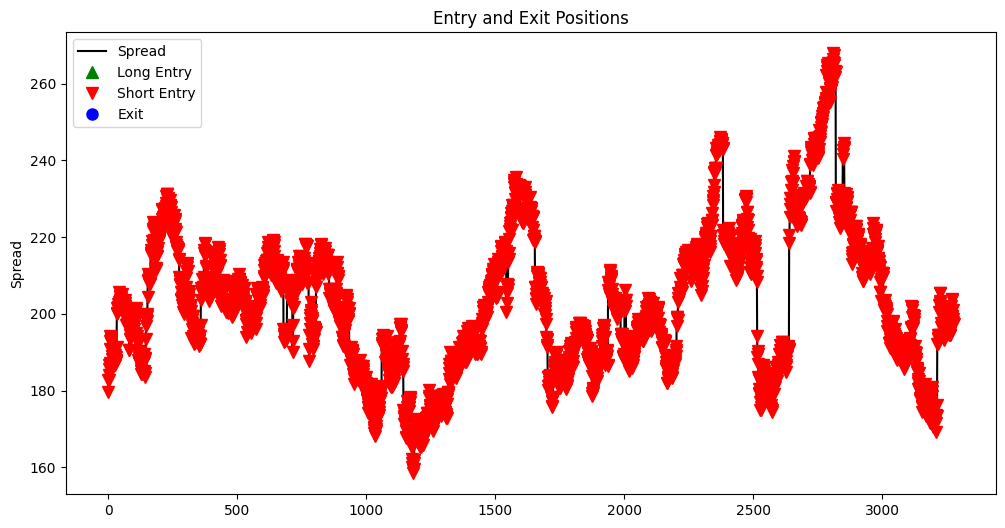

In [ ]:
# Plot entry and exit positions for the pair 1 trading strategy
plot_entry_exit_positions(stocks_prices[[pair1[0], pair1[1]]], spread_pair1, entry_positions_pair1, exit_positions_pair1)

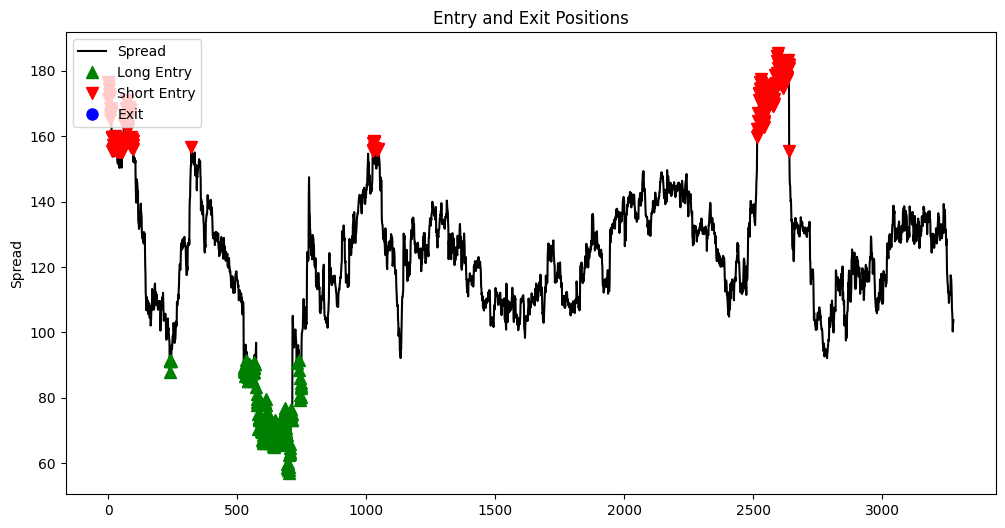

In [ ]:
# Plot entry and exit positions for the pair 2 trading strategy
plot_entry_exit_positions(stocks_prices[[pair2[0], pair2[1]]], spread_pair2, entry_positions_pair2, exit_positions_pair2)

In [ ]:
# Calculate profit/loss for the pair trading strategy
profit_loss_pair1 = calculate_profit_loss(stocks_prices[[pair1[0], pair1[1]]], entry_positions_pair1, exit_positions_pair1)
print(f"Profit/Loss for Pair 1: {profit_loss_pair1}")
profit_loss_pair2 = calculate_profit_loss(stocks_prices[[pair2[0], pair2[1]]], entry_positions_pair2, exit_positions_pair2)
print(f"Profit/Loss for Pair 2: {profit_loss_pair2}")

Profit/Loss for Pair 1: 0
Profit/Loss for Pair 2: 236.01998901367193
